In [ ]:
## REGRESSÃO SIMPLES ##
# Aplicação e ajuste do modelo

In [17]:
# Importanto bibliotecas
import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
import plotly.graph_objects as go # gráficos 3D
from scipy.stats import pearsonr # correlações de Pearson
import statsmodels.api as sm # estimação de modelos
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
from sklearn.preprocessing import LabelEncoder # transformação de dados
from playsound import playsound # reprodução de sons
import pingouin as pg # outro modo para obtenção de matrizes de correlações
import emojis # inserção de emojis em gráficos
from statstests.process import stepwise # procedimento Stepwise
from statstests.tests import shapiro_francia # teste de Shapiro-Francia
from scipy.stats import boxcox # transformação de Box-Cox
from scipy.stats import norm # para plotagem da curva normal
from scipy import stats # utilizado na definição da função 'breusch_pagan_test'


In [6]:
# Gerando dados fictícios para investimento e vendas
np.random.seed(42)
investimento = np.random.uniform(2500, 10000, 50)  # Investimento entre 2.500 e 10.000
vendas = 50 + 3.5 * investimento + np.random.normal(0, 5000, 50)  # Relação linear com ruído


In [10]:
df_invest = pd.DataFrame({'Investimento': investimento, 'Vendas': vendas})
df_invest

,Investimento,Vendas
0,5309.050891,22324.011020
1,9630.357298,34613.091949
2,7989.954564,27436.599561
3,6989.938631,23009.266732
4,3670.139803,5502.879360
5,3669.958903,9295.635117
6,2935.627091,8021.500965
7,8996.321093,36822.734958
8,7008.362588,26297.360506
9,7810.544333,18571.704390


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Investimento  50 non-null     float64
 1   Vendas        50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


In [12]:
# Estatística Descritiva
df_invest.describe()

,Investimento,Vendas
count,50.000000,50.000000
mean,5844.429283,20490.776063
std,2166.624007,8585.504161
min,2654.383707,5502.879360
25%,3878.252472,12474.541765
50%,5770.365671,21038.954899
75%,7373.912027,26262.786019
max,9774.323891,41531.463632


<function matplotlib.pyplot.show(close=None, block=None)>

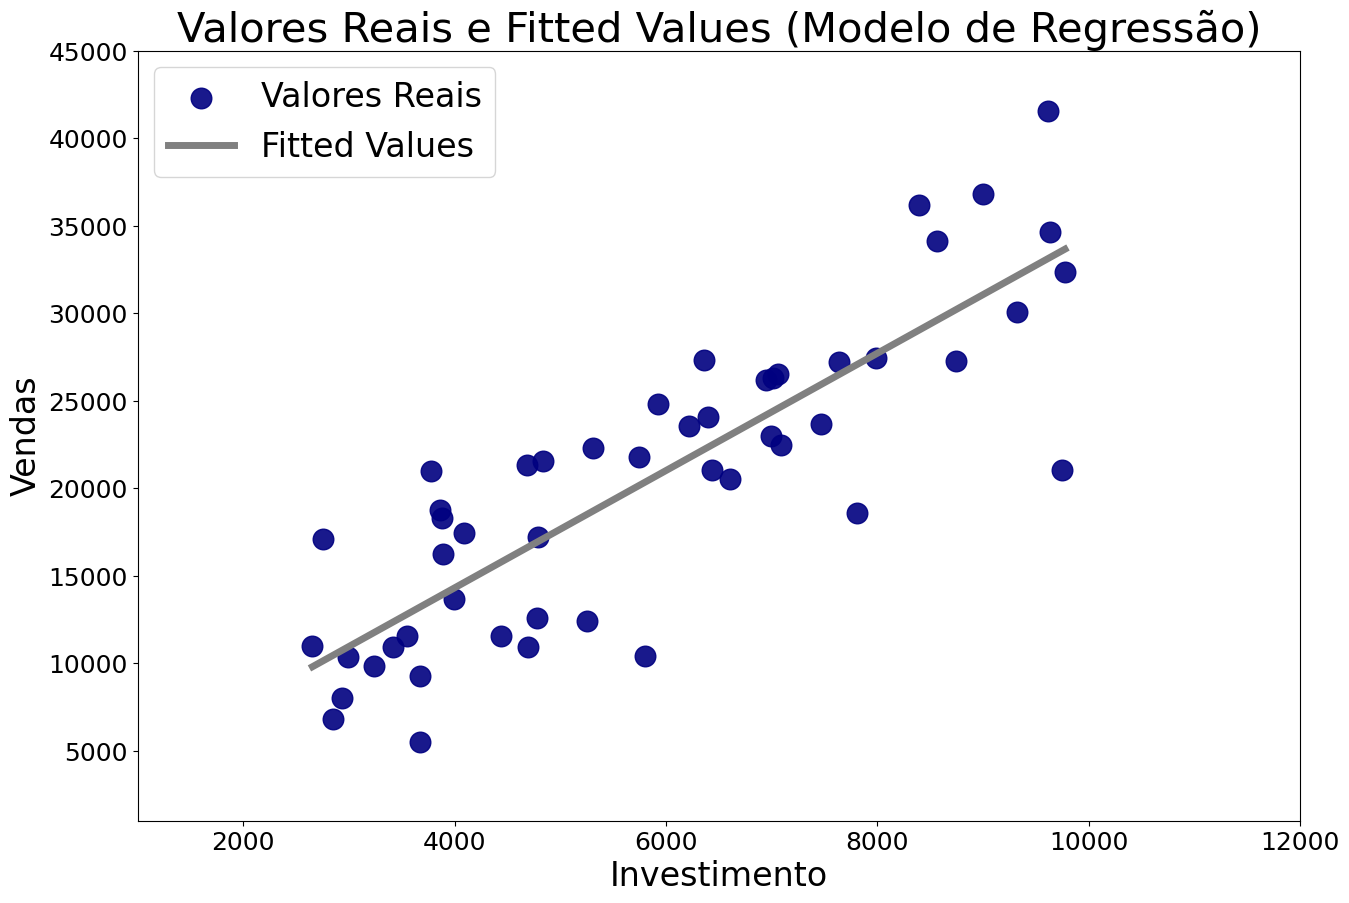

In [28]:
# Gráfico de dispersão com o ajuste linear (fitted values de um modelo
#de regressão) que se adequa às observações: função 'regplot' do pacote 'seaborn'

plt.figure(figsize=(15,10))
sns.regplot(data=df_invest, x='Investimento', y='Vendas', marker='o', ci=False,
            scatter_kws={"color":'navy', 'alpha':0.9, 's':220},
            line_kws={"color":'grey', 'linewidth': 5})
plt.title('Valores Reais e Fitted Values (Modelo de Regressão)', fontsize=30)
plt.xlabel('Investimento', fontsize=24)
plt.ylabel('Vendas', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(1000, 12000)
plt.ylim(1000, 45000)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24, loc='upper left')
plt.show

In [44]:
# Gráfico de dispersão interativo 
# Dados do gráfico
x = df_invest ['Investimento']
y = df_invest ['Vendas']

# Definição da regressão linear
slope, intercept = np.polyfit(x, y, 1)
y_trend = slope * x + intercept

fig = go.Figure()

# Inserção dos pontos (valores reais)
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(color='navy', size=20), name='Valores Reais')
    )

# Inserção da reta (fitted values)
fig.add_trace(go.Scatter(
    x=x,
    y=y_trend,
    mode='lines',
    line=dict(color='dimgray', width=5), name='Fitted Values')
    )

# Configurações de layout
fig.update_layout(
    xaxis_title='Investimento',
    yaxis_title='Vendas',
    title={
        'text': 'Gráfico de Dispersão com Fitted Values',
        'font': {'size': 20, 'color': 'black', 'family': 'Arial'},
        'x': 0.5,
        'y': 0.97,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='snow',
    xaxis=dict(gridcolor='black'),
    yaxis=dict(gridcolor='black'),
    showlegend=True
)

fig.write_html('GraficoDispersao.html')

# Abrir o arquivo HTML no navegador
import webbrowser
webbrowser.open('GraficoDispersao.html')

True

In [34]:
#  Estimação do modelo de regressão linear simples

# Estimação do modelo
modelo = sm.OLS.from_formula( 'Vendas ~ Investimento', df_invest).fit()

# Observação dos parâmetros resultantes da estimação
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Vendas   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     120.5
Date:                Tue, 21 Jan 2025   Prob (F-statistic):           1.09e-14
Time:                        16:02:15   Log-Likelihood:                -491.94
No. Observations:                  50   AIC:                             987.9
Df Residuals:                      48   BIC:                             991.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      905.8364   1900.425      0.477      0.636   -2915.223    4726.896
Investimento     3.3510      0.305     10.978      0.000       2.737       3.965
==============================================================================
Omnibus:                        2.171   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.338   Jarque-Bera (JB):                1.664
Skew:                          -0.447   Prob(JB):                        0.435
Kurtosis:                       3.036   Cond. No.                     1.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### RESULTADOS 
###  Qualidade do Ajuste do Modelo

R-squared (R²): 0.715

Indica que 71,5% da variação na variável dependente Vendas é explicada pela variável independente Investimento em Publicidade, sugerindo um ajuste substancial do modelo.
Adj. R-squared: 0.709

O R² ajustado é ligeiramente menor, refletindo uma penalização pelo número de variáveis no modelo, mas ainda indica um ajuste robusto.

F-statistic: 120.5 (Prob = 1.09e-14).

O valor alto da estatística F e a probabilidade muito baixa indicam que o modelo é estatisticamente significativo.

AIC (987.9) e BIC (991.7): Critérios de informação que podem ser usados para comparar modelos diferentes. Valores menores indicam melhor ajuste.

### Parêmetros do Modelo

Intercepto (905.84):

Indica que, mesmo sem investimento em publicidade, as vendas esperadas são de aproximadamente 905,84 unidades monetárias. No entanto, o p-valor alto (0.636) sugere que o intercepto não é estatisticamente significativo. Entretanto, manten-se o intercepeto, uma vez que, o fato de não ser estatisticamente sigficante está atribuido ao tamanho da amostra.


Investimento (3.3510):

Sugere que um aumento de 1 unidade monetária no investimento em publicidade resulta em um aumento esperado de aproximadamente 3.351 unidades em vendas.O coeficiente é altamente significativo (p < 0.001), com um intervalo de confiança que não inclui zero, o que reforça a relação positiva entre as variáveis.

### Teste Durbin-Watson: 
É utilizado para detectar a presença de autocorrelação nos resíduos de um modelo de regressão linear. A autocorrelação ocorre quando os erros estão correlacionados ao longo das observações, o que pode violar um dos principais pressupostos da regressão linear: a independência dos resíduos.

#### Hipóteses do teste:
Hipótese nula (H₀): Não há autocorrelação serial dos resíduos (𝜌 = 0).
Os resíduos são independentes entre si.

Hipótese alternativa (H₁): Há autocorrelação serial nos resíduos (𝜌 ≠ 0).
Os resíduos estão correlacionados positivamente ou negativamente.

#### Interpretação: 
Interpretação dos resultados 
Valores abaixo de 1 indicam forte autocorrelação positiva
Valores próximos a 2 indicam que os resíduos são independentes
Valores acima de 3 indicam forte autocorrelação negativa
Valores entre 1,5 e 2,5 são relativamente aceitáveis

Resultado: Durbin-Watson:	2.127 
Não há evidências significativas de autocorrelação nos resíduos.


In [36]:
# Salvando fitted values (variável vendas_est) e residuals (variável erro)
#no dataset

df_invest['vendas_est'] = modelo.fittedvalues
df_invest['erro'] = modelo.resid
df_invest

,Investimento,Vendas,vendas_est,erro
0,5309.050891,22324.011020,18696.699515,3627.311505
1,9630.357298,34613.091949,33177.587432,1435.504517
2,7989.954564,27436.599561,27680.525687,-243.926126
3,6989.938631,23009.266732,24329.428295,-1320.161563
4,3670.139803,5502.879360,13204.636342,-7701.756983
5,3669.958903,9295.635117,13204.030136,-3908.395019
6,2935.627091,8021.500965,10743.251924,-2721.750959
7,8996.321093,36822.734958,31052.904211,5769.830747
8,7008.362588,26297.360506,24391.167785,1906.192722
9,7810.544333,18571.704390,27079.314111,-8507.609721


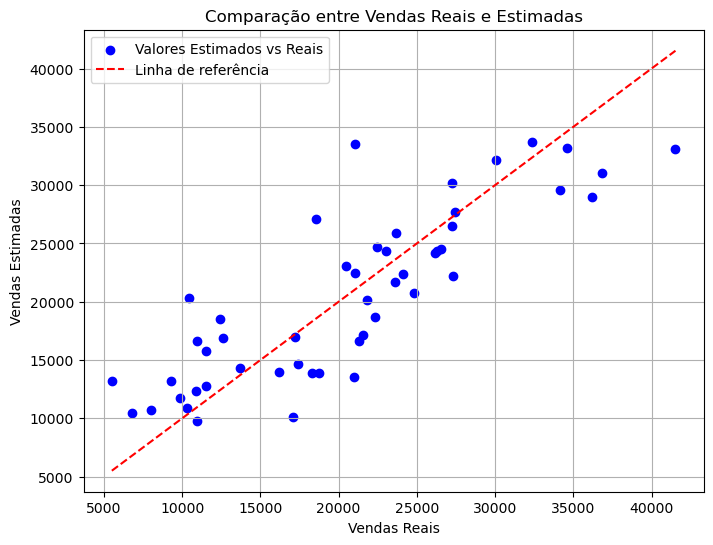

In [38]:
## Plotando Valores reais e valores estimados
plt.figure(figsize=(8, 6))
plt.scatter(df_invest['Vendas'], df_invest['vendas_est'], color='blue', label='Valores Estimados vs Reais')
plt.plot([df_invest['Vendas'].min(), df_invest['Vendas'].max()], [df_invest['Vendas'].min(), df_invest['Vendas'].max()], 
         color='red', linestyle='--', label='Linha de referência')
plt.xlabel('Vendas Reais')
plt.ylabel('Vendas Estimadas')
plt.title('Comparação entre Vendas Reais e Estimadas')
plt.legend()
plt.grid(True)
plt.show()